In [106]:
import numpy as np
import pandas as pd

from matplotlib import colors
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
from IPython import display

%matplotlib inline
import seaborn
seaborn.set()

In [436]:
from yvolv import world
from yvolv import beast
from yvolv import simulate

reload(world)
reload(beast)
reload(simulate)

<module 'yvolv.simulate' from '/Users/Jeff/Code/yvolv/yvolv/simulate.pyc'>

In [437]:
w = world.World(300, 150, tpoints=100, bpoints=60)
s = simulate.Simulation(w, 5000)

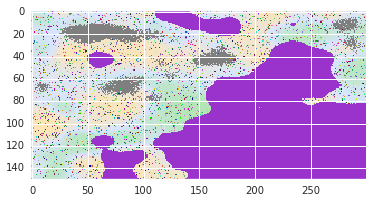

In [438]:
figsize(6, 3)
plt.imshow(s.image(), interpolation="none", filternorm=0)
plt.show()

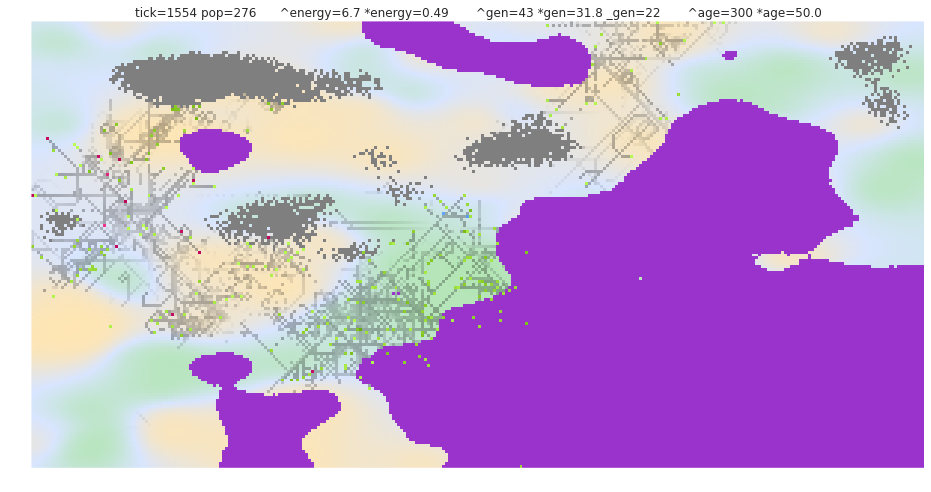

In [ ]:
figsize(16, 8)

for t in np.arange(2100):
    s.tick()
    if len(s.herd) <= 3:
        break
    if (t + 1) % 3 == 0:
        herd = s.herd
        emax = max(b.energy for b in herd)
        eavg = np.mean([b.energy for b in herd])
        gmax = max(b.generation for b in herd)
        gavg = np.mean([b.generation for b in herd])
        gmin = min(b.generation for b in herd)
        amax = max(b.age for b in herd)
        aavg = np.mean([b.age for b in herd])
        display.clear_output(wait=True)
        plt.imshow(s.image(), interpolation="none", filternorm=0)
        plt.title(
            "tick={} pop={}      "
            "^energy={} *energy={}       "
            "^gen={} *gen={} _gen={}       "
            "^age={} *age={}".format(
                s.world.age, len(s.herd),
                round(emax, 2), round(eavg, 2),
                gmax, round(gavg, 1), gmin,
                amax, round(aavg)))
        plt.axis("off")
        plt.show()

In [ ]:
figsize(16, 10)
_, axes = plt.subplots(4, 2)
axes = axes.flatten()
ticks = np.arange(len(s.births))
colors = ("red", "blue", "green", "purple", "orange", "turquoise")

for ser, col in zip((s.red_eaters, s.blue_eaters, s.green_eaters), colors):
    axes[0].plot(ticks, np.log2(ser), color=col, label="log2 {}-eater pop".format(col), alpha=0.4)
    axes[0].legend()
for ser, col, region in zip((s.pop_nw, s.pop_ne, s.pop_sw, s.pop_se), colors, ("nw", "ne", "sw", "se")):
    axes[2].plot(ticks, np.log2(ser), color=col, label="log2 pop in {}".format(region), alpha=0.4)
    axes[2].legend()
for ser, col in zip((s.red_food, s.blue_food, s.green_food), colors):
    axes[3].plot(ticks, ser, color=col, label="available {} food".format(col))
    axes[3].legend()

axes[1].hist([bst.protein_hue for bst in s.herd], bins=np.arange(0, 1, 0.1), label="protein hue")
axes[1].legend()
    
axes[4].plot(ticks, s.herd_age, color="blue", label="age")
axes[4].plot(ticks, 100 * np.array(s.herd_energy), color="green", label="energy x 100")
axes[4].legend()

for ser, col, act in zip(
        (s.lefts, s.forwards, s.rights, s.eats, s.reproduces),
        colors,
        ("left", "forward", "right", "eat", "reproduce")):
    axes[5].plot(
        ticks, pd.Series(np.array(ser) / np.array(s.population).astype(float)).rolling(10).mean(),
        color=col, label=act, alpha=0.4)
axes[5].legend()

for i, col in enumerate(("red", "green", "blue")):
    axes[6].hist(
        [b.pelt_rgb[i] for b in s.herd],
        color=col, label="pelt {}".format(col), alpha=0.4, bins=np.arange(0, 1, 0.025))
axes[6].legend()

axes[7].plot(ticks, np.array(s.population) / np.array(s.food_amount), label="pop per unit food")
axes[7].legend()
plt.show()